In [1]:
import xarray as xr

ds = xr.open_mfdataset('2t.nc')
ds


<xarray.Dataset>
Dimensions:    (latitude: 91, longitude: 180, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 ...
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 80.0 78.0 76.0 ...
  * time       (time) datetime64[ns] 2018-09-24
Data variables:
    t2m        (time, latitude, longitude) float64 261.8 261.8 261.8 261.8 ...

In [2]:
ds.data_vars

Data variables:
    t2m      (time, latitude, longitude) float64 261.8 261.8 261.8 261.8 ...

In [3]:
list(ds.dims)

[u'latitude', u'longitude', u'time']

In [4]:
ds.t2m.attrs

OrderedDict([(u'units', u'K'), (u'long_name', u'2 metre temperature')])

In [5]:
ds.time.values

array(['2018-09-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
print ds.latitude.values[0]
print ds.latitude.values[1] - ds.latitude.values[0]
print ds.longitude.values[0]
print ds.longitude.values[1] - ds.longitude.values[0]

90.0
-2.0
0.0
2.0


(1, 91, 180)
{"units": "K", "long_name": "2 metre temperature"}


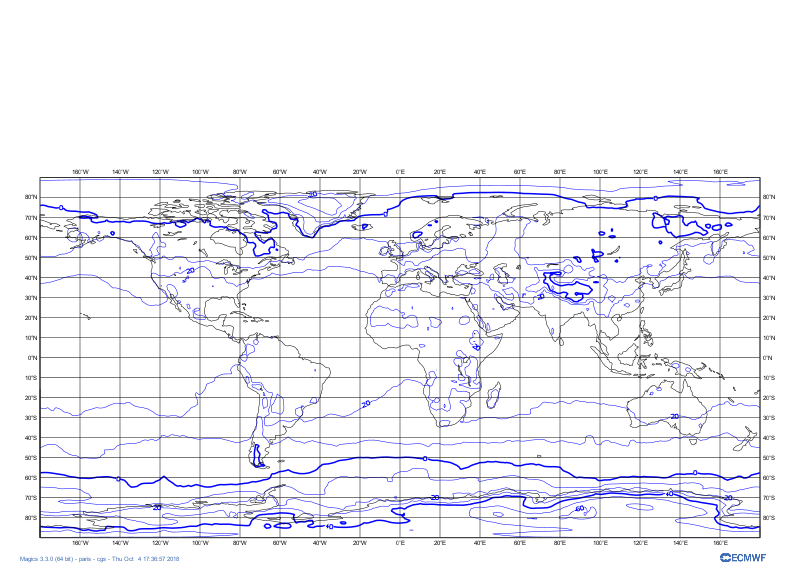

In [7]:
import Magics.macro as magics
import json
import numpy as np


def tomagics(nc):
    
    
    

    x = nc.values

    

    values = nc.values.astype(np.float64)

    lat = ds.latitude.values.astype(np.float64)
    lon = ds.longitude.values.astype(np.float64)


    print json.dumps(ds.t2m.attrs)

    meta = {
                    "paramId" : "167",
                    "shortName" : "2t"
                }

    data = magics.minput( input_field = values[0],
                      input_field_initial_latitude = lat[0],
                      input_field_latitude_step = lat[1] - lat[0],
                      input_field_initial_longitude =lon[0],
                      input_field_longitude_step = lon[1]-lon[0],
                      input_mars_metadata = json.dumps(meta),
                         )
    return data

contour = magics.mcont( contour_automatic_setting ='ecmwf')

magics.plot(tomagics(ds, ds.t2m), contour, magics.mcoast())

In [9]:
type(ds.t.values[0])

numpy.ndarray

In [14]:
ds.latitude.values

array([ 90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,
        79.,  78.,  77.,  76.,  75.,  74.,  73.,  72.,  71.,  70.,  69.,
        68.,  67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,
        57.,  56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,
        46.,  45.,  44.,  43.,  42.,  41.,  40.,  39.,  38.,  37.,  36.,
        35.,  34.,  33.,  32.,  31.,  30.,  29.,  28.,  27.,  26.,  25.,
        24.,  23.,  22.,  21.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,
        13.,  12.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,
         2.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,
        -9., -10., -11., -12., -13., -14., -15., -16., -17., -18., -19.,
       -20., -21., -22., -23., -24., -25., -26., -27., -28., -29., -30.,
       -31., -32., -33., -34., -35., -36., -37., -38., -39., -40., -41.,
       -42., -43., -44., -45., -46., -47., -48., -49., -50., -51., -52.,
       -53., -54., -55., -56., -57., -58., -59., -6